# 03 BMRA

Run BMRA based on global responses derived from the pathway activity predictions.

In [1]:
import pandas as pd
import numpy as np
import os
import bmra

In [2]:
cell_line = 'BC3C'

data_dir =f'/home/jing/Phd_project/project_UCD_blca/blca_publication_OUTPUT/blca_publication_OUTPUT_bmra/blca_publication_OUTPUT_bmra_{cell_line}/'
data_dir_1 = os.path.join(data_dir, f'00_outputs_2020_{cell_line}/')
data_dir_2 = os.path.join(data_dir, f'01_outputs_2020_{cell_line}/')

info_dir =f"/home/jing/Phd_project/project_UCD_blca/blca_publication_OUTPUT/blca_publication_OUTPUT_LINCS/00_outputs_2020_{cell_line}/"

out_dir = os.path.join(data_dir,f'02_outputs_2020_{cell_line}/')


os.makedirs(out_dir, exist_ok = True)

## Load data

### Global responses

Assembled from global responses calculated from predicted pathway activities, and DPD global responses.

In [3]:
def assemble_R_global(pathway_rglobal_file, dpd_rglobal_file):
    """
    Assemble full R_global matrix
    """
    R_global_modules_df = pd.read_csv(pathway_rglobal_file, index_col = 0)

    perts = R_global_modules_df.columns.tolist()

    R_global_DPD_df = pd.read_csv(dpd_rglobal_file, index_col=0).T

    # filter by perts list
    R_global_DPD_df = R_global_DPD_df[R_global_DPD_df.index.isin(perts)]

    # sort by perts list
    R_global_DPD_df["sort_col"] = R_global_DPD_df.index.map({val: i for i, val in enumerate(perts)})
    R_global_DPD_df = R_global_DPD_df.sort_values("sort_col")
    R_global_DPD_df = R_global_DPD_df.drop("sort_col", axis = 1)

    # transpose
    R_global_DPD_df = R_global_DPD_df.T

    R_global_df = pd.concat([R_global_modules_df, R_global_DPD_df])

    return R_global_df

In [4]:
R_global_df = assemble_R_global(
    pathway_rglobal_file = os.path.join(data_dir_2, "R_global_annotated.csv"),
    dpd_rglobal_file = os.path.join(data_dir_1, "R_global_DPDonly_annotated.csv"),
)

modules = R_global_df.index.tolist()
exp_ids = R_global_df.columns.tolist()

R_global = R_global_df.values
n_modules = R_global.shape[0]

print(R_global.shape)
display(R_global_df)

(13, 116)


,ASG002_BC3C_24H:A10,ASG002_BC3C_24H:A11,ASG002_BC3C_24H:A19,ASG002_BC3C_24H:A20,ASG002_BC3C_24H:A21,ASG002_BC3C_24H:B10,ASG002_BC3C_24H:B11,ASG002_BC3C_24H:B12,ASG002_BC3C_24H:B14,ASG002_BC3C_24H:B15,...,MOAR010_BC3C_24H:L21,MOAR011_BC3C_24H:C01,MOAR011_BC3C_24H:C02,MOAR011_BC3C_24H:C03,MOAR011_BC3C_24H:C10,MOAR011_BC3C_24H:C11,MOAR011_BC3C_24H:F07,MOAR011_BC3C_24H:F08,MOAR011_BC3C_24H:F09,MOAR011_BC3C_24H:J10
Androgen,-0.066383,-0.026810,-0.002846,-0.121209,-0.002077,0.015296,0.008254,0.026381,0.011150,0.016022,...,0.013912,-0.011922,0.003319,0.006919,-0.068403,0.005122,-0.044736,0.034410,0.026786,-0.613759
CDK1,-0.684760,-0.654106,0.122886,-0.264504,0.259283,-0.374288,0.082547,0.187527,0.165777,0.135594,...,0.150370,0.099576,-0.132924,-0.014631,0.211416,0.083129,-0.589848,0.173936,-0.040329,0.340719
CDK2,-0.198444,-0.179348,-0.033931,-0.009549,-0.001702,-0.026617,0.010837,-0.036586,-0.036595,0.028302,...,-1.060688,-0.012627,-0.002410,-0.002656,-0.022983,0.023359,-0.058881,-0.029916,-0.033574,-0.005662
CDK4_6,-0.764990,-0.730992,-0.285279,-0.330903,-0.469062,-0.021706,0.093823,0.001591,-0.009615,-0.172371,...,0.178062,-0.009586,0.018364,0.074733,-0.597657,-0.362518,-0.518913,0.136490,0.065511,-0.101307
EGFR,0.549444,0.452324,0.193299,0.179124,0.370865,0.012434,-0.343227,0.025867,0.220917,0.181411,...,-0.629846,0.017271,-0.183831,-0.057593,-0.088515,-0.332594,-1.217961,-0.324715,-0.129304,-0.187491
Estrogen,-0.064700,-0.146567,-0.112804,-0.314575,-0.788776,-0.261706,-0.023994,-0.121496,-0.132983,-0.086547,...,0.117931,0.033153,0.038232,-0.002936,0.038884,0.120571,-1.058685,-0.196859,0.207388,0.047199
FGFR,-0.228850,-0.245000,-0.072124,0.069715,-0.021881,-0.400293,-0.006085,0.044740,-0.130965,-0.094341,...,0.146924,-0.068348,0.025694,-0.039654,-0.107467,-0.481338,-0.978019,-0.115399,0.119322,0.004962
PI3K,-1.840868,-1.638060,-1.480251,-1.264902,-0.673181,0.463301,-0.206204,-0.743931,-0.657640,-0.965328,...,0.244673,-0.328258,-0.388938,-0.573840,-0.507185,-0.158368,-1.061264,-0.009695,-0.783351,-0.122861
p53,-0.203197,-0.336953,-0.149505,-0.353285,-0.079224,-1.623223,-1.457357,-1.767792,-0.183297,-0.069948,...,0.123831,0.143809,-0.021970,0.136895,0.030533,0.213351,-0.218400,-0.053723,0.037355,0.374609
TOP2A,-0.153562,0.116304,-0.223548,-0.146255,-0.127600,0.042875,0.078235,-0.025817,-1.999627,-0.184919,...,0.319783,0.124103,0.112396,-0.102392,-0.414168,0.077822,-0.695963,0.018656,-0.004948,-0.398356


In [5]:
print(R_global_df.values.min())
print(R_global_df.values.max())

-32.29022953772266
27.274971480168528


### Perturbation matrix

In [6]:
inhib_conc_df = pd.read_csv(os.path.join(data_dir_1, "inhib_conc_annotated.csv"), index_col = 0)
#LFC_PLCg = pd.read_csv(os.path.join(info_dir,"PLCg_Data_log_2020.csv"),index_col=0)
#inhib_conc = inhib_conc_df.drop(columns=LFC_PLCg.index).values
inhib_conc = inhib_conc_df.values

n_DPDs = R_global.shape[0] - inhib_conc.shape[0]

pert_modules = np.where(inhib_conc != 0, 1, 0)
pert_DPD = np.zeros((n_DPDs, len(exp_ids)))

pert = np.vstack([pert_modules, pert_DPD])

print(pert.shape)
print(pert)

(13, 116)
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Networks

In [7]:
# empty prior
#G_prior = np.zeros((n_modules, n_modules))
G_prior_df = pd.read_excel(os.path.join(info_dir, "ALL_DATA_2020_Jing.xlsx"), sheet_name = "prior_net_work", index_col = 0)

G_prior = G_prior_df.values
G_prior_df

,CDK1,CDK2,CDK4_6,EGFR,PI3K,FGFR,TOP2A,p53,Estrogen,Androgen,blca_inv,blca_onc,surv_coef
CDK1,0,0,0,0,0,0,0,0,0,0,0,0,0
CDK2,0,0,0,0,0,0,0,0,0,0,0,0,0
CDK4_6,0,0,0,0,0,0,0,0,0,0,0,0,0
EGFR,0,0,0,0,0,0,0,0,0,0,0,0,0
PI3K,0,0,0,0,0,0,0,0,0,0,0,0,0
FGFR,0,0,0,0,0,0,0,0,0,0,0,0,0
TOP2A,0,0,0,0,0,0,0,0,0,0,0,0,0
p53,0,0,0,0,0,0,0,0,0,0,0,0,0
Estrogen,0,0,0,0,0,0,0,0,0,0,0,0,0
Androgen,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
#G_prior_r_df = pd.read_excel(os.path.join(info_dir, "ALL_DATA_2020.xlsx"), sheet_name = "prior_r", index_col = 0)

#G_prior_r = G_prior_r_df.values
#G_prior_r_df

In [9]:
G_not = np.eye(n_modules)
G_not[:, n_modules - n_DPDs :] = 1

G_not

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.]])

## Run BMRA

In [10]:
n_gibbs = 200_000
n_window = 5_000

mode = "all"
n_iterations = 1

In [11]:
A_mean, A_sd, r_mean, r_sd = bmra.run_bmra(R_global,
            pert,
            G_prior,
            G_not,
            #r_prior = G_prior_r,
            n_gibbs = n_gibbs,
            n_window = n_window,
            mode = mode,
            n_iterations = n_iterations,
        )

A_mean_df = pd.DataFrame(A_mean, index = modules, columns = modules)
A_sd_df = pd.DataFrame(A_sd, index = modules, columns = modules)
r_mean_df = pd.DataFrame(r_mean, index = modules, columns = modules)
r_sd_df = pd.DataFrame(r_sd, index = modules, columns = modules)

display(A_mean_df)
display(A_sd_df)
display(r_mean_df)
display(r_sd_df)

A_mean_df.to_csv(os.path.join(out_dir, "A_mean.csv"))
A_sd_df.to_csv(os.path.join(out_dir, "A_sd.csv"))
r_mean_df.to_csv(os.path.join(out_dir, "r_mean.csv"))
r_sd_df.to_csv(os.path.join(out_dir, "r_sd.csv"))

,Androgen,CDK1,CDK2,CDK4_6,EGFR,Estrogen,FGFR,PI3K,p53,TOP2A,blca_invasiveness,blca_oncogenesis,blca_survival
Androgen,0.0,0.015364,0.0,0.369177,0.613329,0.00000,0.000000,0.088538,0.011792,0.000000,0.0,0.0,0.0
CDK1,0.0,0.000000,0.0,1.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
CDK2,0.0,0.000000,0.0,0.369169,0.000000,0.00000,1.000000,0.063784,0.000000,0.000000,0.0,0.0,0.0
CDK4_6,0.0,1.000000,0.0,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.0,0.0,0.0
EGFR,0.0,0.000000,0.0,1.000000,0.000000,0.00000,1.000000,1.000000,0.001394,0.000109,0.0,0.0,0.0
Estrogen,0.0,1.000000,0.0,0.000000,0.158993,0.00000,0.841776,0.158993,0.000000,0.000000,0.0,0.0,0.0
FGFR,0.0,0.000000,0.0,1.000000,1.000000,0.00000,0.000000,0.000000,1.000000,0.533430,0.0,0.0,0.0
PI3K,0.0,0.190206,0.0,0.000000,0.000000,0.82947,0.000000,0.000000,1.000000,1.000000,0.0,0.0,0.0
p53,0.0,0.000000,0.0,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0
TOP2A,0.0,0.000000,0.0,1.000000,1.000000,0.00000,0.000000,0.172772,0.000000,0.000000,0.0,0.0,0.0


,Androgen,CDK1,CDK2,CDK4_6,EGFR,Estrogen,FGFR,PI3K,p53,TOP2A,blca_invasiveness,blca_oncogenesis,blca_survival
Androgen,0.0,1.229961e-01,0.0,4.825821e-01,4.869872e-01,0.000000e+00,0.000000e+00,2.840753e-01,1.079496e-01,0.000000e+00,0.0,0.0,0.0
CDK1,0.0,0.000000e+00,0.0,4.440892e-16,0.000000e+00,4.440892e-16,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0
CDK2,0.0,0.000000e+00,0.0,4.825798e-01,0.000000e+00,0.000000e+00,1.110223e-15,2.443685e-01,0.000000e+00,0.000000e+00,0.0,0.0,0.0
CDK4_6,0.0,6.661338e-16,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.661338e-16,0.000000e+00,6.661338e-16,0.0,0.0,0.0
EGFR,0.0,0.000000e+00,0.0,8.881784e-16,0.000000e+00,0.000000e+00,8.881784e-16,8.881784e-16,3.731550e-02,1.043318e-02,0.0,0.0,0.0
Estrogen,0.0,6.661338e-16,0.0,0.000000e+00,3.656693e-01,0.000000e+00,3.649506e-01,3.656693e-01,0.000000e+00,0.000000e+00,0.0,0.0,0.0
FGFR,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.988812e-01,0.0,0.0,0.0
PI3K,0.0,3.924638e-01,0.0,0.000000e+00,0.000000e+00,3.760976e-01,0.000000e+00,0.000000e+00,1.332268e-15,1.332268e-15,0.0,0.0,0.0
p53,0.0,0.000000e+00,0.0,0.000000e+00,2.886580e-15,0.000000e+00,0.000000e+00,2.886580e-15,0.000000e+00,0.000000e+00,0.0,0.0,0.0
TOP2A,0.0,0.000000e+00,0.0,2.331468e-15,2.331468e-15,0.000000e+00,0.000000e+00,3.780498e-01,0.000000e+00,0.000000e+00,0.0,0.0,0.0


,Androgen,CDK1,CDK2,CDK4_6,EGFR,Estrogen,FGFR,PI3K,p53,TOP2A,blca_invasiveness,blca_oncogenesis,blca_survival
Androgen,0.0,0.000481,0.0,0.018135,-0.022685,0.000000,0.000000,0.002330,0.000373,0.000000,0.0,0.0,0.0
CDK1,0.0,0.000000,0.0,0.354644,0.000000,0.321520,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
CDK2,0.0,0.000000,0.0,0.026668,0.000000,0.000000,0.102662,0.002112,0.000000,0.000000,0.0,0.0,0.0
CDK4_6,0.0,0.222279,0.0,0.000000,0.000000,0.000000,0.000000,0.178793,0.000000,0.202894,0.0,0.0,0.0
EGFR,0.0,0.000000,0.0,-0.244241,0.000000,0.000000,0.328975,-0.144973,0.000100,-0.000009,0.0,0.0,0.0
Estrogen,0.0,0.182992,0.0,0.000000,0.025503,0.000000,0.195247,0.018806,0.000000,0.000000,0.0,0.0,0.0
FGFR,0.0,0.000000,0.0,0.281496,0.324892,0.000000,0.000000,0.000000,0.139642,0.073128,0.0,0.0,0.0
PI3K,0.0,0.046887,0.0,0.000000,0.000000,0.261719,0.000000,0.000000,0.302867,0.570094,0.0,0.0,0.0
p53,0.0,0.000000,0.0,0.000000,0.184882,0.000000,0.000000,0.252898,0.000000,0.000000,0.0,0.0,0.0
TOP2A,0.0,0.000000,0.0,0.213377,-0.150882,0.000000,0.000000,0.014126,0.000000,0.000000,0.0,0.0,0.0


,Androgen,CDK1,CDK2,CDK4_6,EGFR,Estrogen,FGFR,PI3K,p53,TOP2A,blca_invasiveness,blca_oncogenesis,blca_survival
Androgen,0.0,0.004117,0.0,0.024141,0.019047,0.000000,0.000000,0.007669,0.003564,0.000000,0.0,0.0,0.0
CDK1,0.0,0.000000,0.0,0.011392,0.000000,0.012138,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
CDK2,0.0,0.000000,0.0,0.037215,0.000000,0.000000,0.019515,0.008429,0.000000,0.000000,0.0,0.0,0.0
CDK4_6,0.0,0.023220,0.0,0.000000,0.000000,0.000000,0.000000,0.017526,0.000000,0.027141,0.0,0.0,0.0
EGFR,0.0,0.000000,0.0,0.051242,0.000000,0.000000,0.057306,0.032235,0.002708,0.000876,0.0,0.0,0.0
Estrogen,0.0,0.019358,0.0,0.000000,0.059608,0.000000,0.086264,0.044132,0.000000,0.000000,0.0,0.0,0.0
FGFR,0.0,0.000000,0.0,0.034068,0.021246,0.000000,0.000000,0.000000,0.018839,0.072113,0.0,0.0,0.0
PI3K,0.0,0.097624,0.0,0.000000,0.000000,0.123426,0.000000,0.000000,0.025149,0.033062,0.0,0.0,0.0
p53,0.0,0.000000,0.0,0.000000,0.007907,0.000000,0.000000,0.006661,0.000000,0.000000,0.0,0.0,0.0
TOP2A,0.0,0.000000,0.0,0.028600,0.010605,0.000000,0.000000,0.031823,0.000000,0.000000,0.0,0.0,0.0


In [12]:
np.fill_diagonal(r_mean_df.values,-1)
rm_minus_inv = pd.DataFrame(np.linalg.pinv(r_mean_df),index=r_mean_df.index,columns=r_mean_df.columns)*(-1)
rm_minus_inv.to_csv(os.path.join(out_dir, 'r_minv.csv'))
display(rm_minus_inv)

,Androgen,CDK1,CDK2,CDK4_6,EGFR,Estrogen,FGFR,PI3K,p53,TOP2A,blca_invasiveness,blca_oncogenesis,blca_survival
Androgen,1.000000e+00,0.008343,7.745779e-18,0.027969,-0.026231,0.005869,-0.007483,0.012177,0.003013,0.012070,4.245222e-18,-3.592073e-17,-0.0
CDK1,-7.684646e-17,1.184619,-8.345537e-17,0.473420,0.022368,0.407637,0.086949,0.102240,0.043109,0.160698,8.637942e-17,-3.766995e-16,-0.0
CDK2,-1.585379e-16,0.016051,1.000000e+00,0.062201,0.037558,0.008699,0.116716,0.013518,0.020396,0.028861,3.717707e-16,-2.026158e-16,-0.0
CDK4_6,2.903682e-17,0.310114,-2.473934e-16,1.206911,-0.032968,0.164870,0.021345,0.248976,0.078384,0.388376,1.567276e-16,-1.120908e-16,-0.0
EGFR,5.843864e-17,-0.076720,-1.228718e-16,-0.233905,1.132778,-0.080486,0.356941,-0.213277,-0.014637,-0.142954,1.109914e-17,4.209271e-16,-0.0
Estrogen,-1.268494e-17,0.232143,1.019777e-16,0.141191,0.105935,1.085987,0.246886,0.043361,0.047619,0.071420,3.908374e-16,5.062544e-17,-0.0
FGFR,6.512726e-17,0.072282,2.778547e-17,0.287579,0.374615,0.034581,1.129991,0.043333,0.170956,0.165683,2.331902e-16,-4.144479e-16,-0.0
PI3K,-3.302228e-17,0.170783,-1.506068e-16,0.232683,-0.010100,0.355938,0.066173,1.150193,0.357594,0.707767,8.749229e-17,4.142255e-16,-0.0
p53,2.620603e-17,0.029006,-2.675263e-16,0.015600,0.206875,0.075136,0.082727,0.251451,1.087729,0.152563,8.970982e-17,8.785908e-17,-0.0
TOP2A,-2.502221e-18,0.080159,8.503220e-17,0.296106,-0.178093,0.052351,-0.048367,0.101553,0.023985,1.114437,-8.361977e-17,-3.389866e-16,-0.0


In [13]:
con_mat = pd.DataFrame(columns=['From','To','Strength'])
for con_to in r_mean_df.index:
    for con_from in r_mean_df.columns:
        if ((r_mean_df.loc[con_to,con_from] != 0) & (con_from != con_to)):
            row_df = pd.DataFrame([[con_from,con_to,r_mean_df.loc[con_to,con_from]]],columns=['From','To','Strength'])
            if con_mat.empty:
                con_mat = row_df.copy()
            else:
                con_mat = pd.concat([con_mat,row_df],axis=0,ignore_index=True)
            #con_mat = con_mat.append({'From':con_from,'To':con_to,'Strength':r_mean_df.loc[con_to,con_from]},ignore_index=True)
con_mat.to_csv(os.path.join(out_dir, 'r_net.txt'),sep='\t',index=False)
display(con_mat)

,From,To,Strength
0,CDK1,Androgen,0.000481
1,CDK4_6,Androgen,0.018135
2,EGFR,Androgen,-0.022685
3,PI3K,Androgen,0.002330
4,p53,Androgen,0.000373
5,CDK4_6,CDK1,0.354644
6,Estrogen,CDK1,0.321520
7,CDK4_6,CDK2,0.026668
8,FGFR,CDK2,0.102662
9,PI3K,CDK2,0.002112


In [14]:
# now the same but with filtered matrices
# threshold value
Athr = 0.5

rm_filt = r_mean_df[np.abs(A_mean_df) > Athr].fillna(0).copy()
np.fill_diagonal(rm_filt.values,-1)
rm_filt.to_csv(os.path.join(out_dir, 'r_mean_filt.csv'))
display(rm_filt)

rm_filt_minus_inv = pd.DataFrame(np.linalg.pinv(rm_filt),index=rm_filt.index,columns=rm_filt.columns)*(-1)
rm_filt_minus_inv.to_csv(os.path.join(out_dir, 'r_minv_filt.csv'))
display(rm_minus_inv)

con_mat = pd.DataFrame(columns=['From','To','Strength'])
for con_to in rm_filt.index:
    for con_from in rm_filt.columns:
        if ((rm_filt.loc[con_to,con_from] != 0) & (con_from != con_to)):
            row_df = pd.DataFrame([[con_from,con_to,rm_filt.loc[con_to,con_from]]],columns=['From','To','Strength'])
            if con_mat.empty:
                con_mat = row_df.copy()
            else:
                con_mat = pd.concat([con_mat,row_df],axis=0,ignore_index=True)
            #con_mat = con_mat.append({'From':con_from,'To':con_to,'Strength':r_mean_df.loc[con_to,con_from]},ignore_index=True)
con_mat.to_csv(os.path.join(out_dir, 'r_net_filt.txt'),sep='\t',index=False)
#display(con_mat)


,Androgen,CDK1,CDK2,CDK4_6,EGFR,Estrogen,FGFR,PI3K,p53,TOP2A,blca_invasiveness,blca_oncogenesis,blca_survival
Androgen,-1.0,0.000000,0.0,0.000000,-0.022685,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
CDK1,0.0,-1.000000,0.0,0.354644,0.000000,0.321520,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
CDK2,0.0,0.000000,-1.0,0.000000,0.000000,0.000000,0.102662,0.000000,0.000000,0.000000,0.0,0.0,0.0
CDK4_6,0.0,0.222279,0.0,-1.000000,0.000000,0.000000,0.000000,0.178793,0.000000,0.202894,0.0,0.0,0.0
EGFR,0.0,0.000000,0.0,-0.244241,-1.000000,0.000000,0.328975,-0.144973,0.000000,0.000000,0.0,0.0,0.0
Estrogen,0.0,0.182992,0.0,0.000000,0.000000,-1.000000,0.195247,0.000000,0.000000,0.000000,0.0,0.0,0.0
FGFR,0.0,0.000000,0.0,0.281496,0.324892,0.000000,-1.000000,0.000000,0.139642,0.073128,0.0,0.0,0.0
PI3K,0.0,0.000000,0.0,0.000000,0.000000,0.261719,0.000000,-1.000000,0.302867,0.570094,0.0,0.0,0.0
p53,0.0,0.000000,0.0,0.000000,0.184882,0.000000,0.000000,0.252898,-1.000000,0.000000,0.0,0.0,0.0
TOP2A,0.0,0.000000,0.0,0.213377,-0.150882,0.000000,0.000000,0.000000,0.000000,-1.000000,0.0,0.0,0.0


,Androgen,CDK1,CDK2,CDK4_6,EGFR,Estrogen,FGFR,PI3K,p53,TOP2A,blca_invasiveness,blca_oncogenesis,blca_survival
Androgen,1.000000e+00,0.008343,7.745779e-18,0.027969,-0.026231,0.005869,-0.007483,0.012177,0.003013,0.012070,4.245222e-18,-3.592073e-17,-0.0
CDK1,-7.684646e-17,1.184619,-8.345537e-17,0.473420,0.022368,0.407637,0.086949,0.102240,0.043109,0.160698,8.637942e-17,-3.766995e-16,-0.0
CDK2,-1.585379e-16,0.016051,1.000000e+00,0.062201,0.037558,0.008699,0.116716,0.013518,0.020396,0.028861,3.717707e-16,-2.026158e-16,-0.0
CDK4_6,2.903682e-17,0.310114,-2.473934e-16,1.206911,-0.032968,0.164870,0.021345,0.248976,0.078384,0.388376,1.567276e-16,-1.120908e-16,-0.0
EGFR,5.843864e-17,-0.076720,-1.228718e-16,-0.233905,1.132778,-0.080486,0.356941,-0.213277,-0.014637,-0.142954,1.109914e-17,4.209271e-16,-0.0
Estrogen,-1.268494e-17,0.232143,1.019777e-16,0.141191,0.105935,1.085987,0.246886,0.043361,0.047619,0.071420,3.908374e-16,5.062544e-17,-0.0
FGFR,6.512726e-17,0.072282,2.778547e-17,0.287579,0.374615,0.034581,1.129991,0.043333,0.170956,0.165683,2.331902e-16,-4.144479e-16,-0.0
PI3K,-3.302228e-17,0.170783,-1.506068e-16,0.232683,-0.010100,0.355938,0.066173,1.150193,0.357594,0.707767,8.749229e-17,4.142255e-16,-0.0
p53,2.620603e-17,0.029006,-2.675263e-16,0.015600,0.206875,0.075136,0.082727,0.251451,1.087729,0.152563,8.970982e-17,8.785908e-17,-0.0
TOP2A,-2.502221e-18,0.080159,8.503220e-17,0.296106,-0.178093,0.052351,-0.048367,0.101553,0.023985,1.114437,-8.361977e-17,-3.389866e-16,-0.0


In [15]:
# number of zero elements in the matrix
display(len(rm_filt.index)*len(rm_filt.columns) - rm_filt.astype(bool).sum().sum())

129

In [16]:
# number of non-zero elements in the matrix
display(rm_filt.astype(bool).sum().sum() - len(modules))

27

### Visualization

In [17]:
df_subset=rm_filt_minus_inv[[ 'CDK1', 'CDK2', 'CDK4_6', 'EGFR', 'Estrogen', 'FGFR',
       'PI3K', 'p53', 'TOP2A']]
df_subset = df_subset.loc[['blca_invasiveness',	'blca_oncogenesis',	'blca_survival']]

In [18]:
t_df_subset=df_subset.T
df_subset.reset_index(inplace=True)

Text(0.5, 1.0, 'Predicted global signaling pathway responses of BC3C cell line under conditions ')

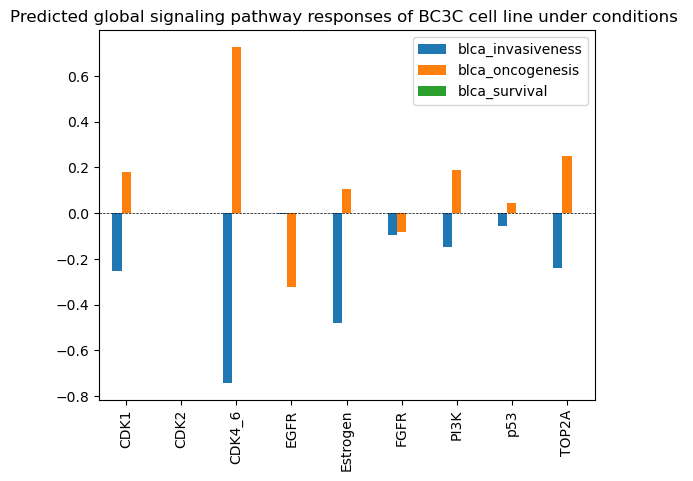

In [19]:
import matplotlib.pyplot as plt
t_df_subset.plot.bar()
plt.axhline(y=0, linestyle='--', color='black',linewidth=0.5)
plt.title(f"Predicted global signaling pathway responses of {cell_line} cell line under conditions ")

In [20]:
display(rm_filt)
rm_subset=rm_filt[['CDK1', 'CDK2', 'CDK4_6', 'EGFR', 'Estrogen', 'FGFR',
       'PI3K', 'p53', 'TOP2A']]

,Androgen,CDK1,CDK2,CDK4_6,EGFR,Estrogen,FGFR,PI3K,p53,TOP2A,blca_invasiveness,blca_oncogenesis,blca_survival
Androgen,-1.0,0.000000,0.0,0.000000,-0.022685,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
CDK1,0.0,-1.000000,0.0,0.354644,0.000000,0.321520,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
CDK2,0.0,0.000000,-1.0,0.000000,0.000000,0.000000,0.102662,0.000000,0.000000,0.000000,0.0,0.0,0.0
CDK4_6,0.0,0.222279,0.0,-1.000000,0.000000,0.000000,0.000000,0.178793,0.000000,0.202894,0.0,0.0,0.0
EGFR,0.0,0.000000,0.0,-0.244241,-1.000000,0.000000,0.328975,-0.144973,0.000000,0.000000,0.0,0.0,0.0
Estrogen,0.0,0.182992,0.0,0.000000,0.000000,-1.000000,0.195247,0.000000,0.000000,0.000000,0.0,0.0,0.0
FGFR,0.0,0.000000,0.0,0.281496,0.324892,0.000000,-1.000000,0.000000,0.139642,0.073128,0.0,0.0,0.0
PI3K,0.0,0.000000,0.0,0.000000,0.000000,0.261719,0.000000,-1.000000,0.302867,0.570094,0.0,0.0,0.0
p53,0.0,0.000000,0.0,0.000000,0.184882,0.000000,0.000000,0.252898,-1.000000,0.000000,0.0,0.0,0.0
TOP2A,0.0,0.000000,0.0,0.213377,-0.150882,0.000000,0.000000,0.000000,0.000000,-1.000000,0.0,0.0,0.0


In [21]:
rm_subset=rm_subset.loc[['blca_invasiveness',	'blca_oncogenesis',	'blca_survival']]
rm_subset=rm_subset.T
display(rm_subset)

,blca_invasiveness,blca_oncogenesis,blca_survival
CDK1,0.000000,0.000000,0.0
CDK2,0.000000,0.000000,0.0
CDK4_6,-0.575701,0.554492,0.0
EGFR,0.000000,-0.264372,0.0
Estrogen,-0.360027,0.000000,0.0
FGFR,0.000000,0.000000,0.0
PI3K,0.000000,0.000000,0.0
p53,0.000000,0.000000,0.0
TOP2A,0.000000,0.000000,0.0


Text(0.5, 1.0, 'Predicted local signaling pathway responses of BC3C cell line under conditions ')

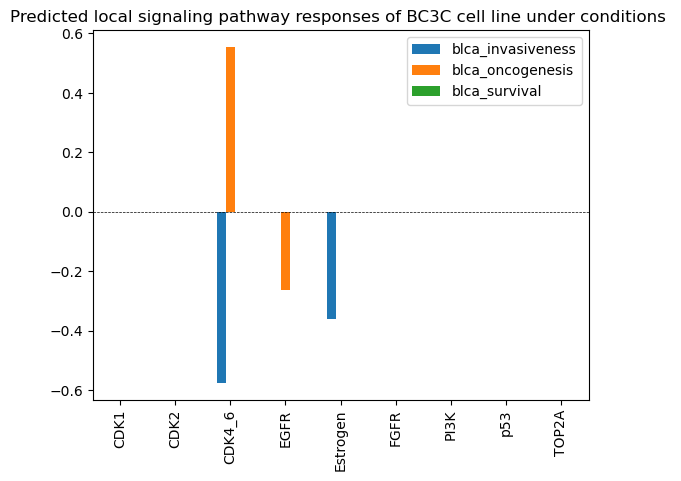

In [22]:
rm_subset.plot.bar()
plt.axhline(y=0, linestyle='--', color='black',linewidth=0.5)
plt.title(f"Predicted local signaling pathway responses of {cell_line} cell line under conditions ")